### Import Libraries

In [1]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224,224]

train_path = 'C:/Users/mdzid/Documents/yolo/Dataset/train'
test_path = 'C:/Users/mdzid/Documents/yolo/Dataset/val'

### Creating Vgg16 Model

In [3]:
vgg16 = VGG16(input_shape = IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [4]:
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
for layer in vgg16.layers:
  layer.trainable= False

In [6]:
folder = glob('C:/Users/mdzid/Documents/yolo/Dataset/train/*')

In [7]:
folder

['C:/Users/mdzid/Documents/yolo/Dataset/train\\Black Spot',
 'C:/Users/mdzid/Documents/yolo/Dataset/train\\Cercospora Leaf Spot',
 'C:/Users/mdzid/Documents/yolo/Dataset/train\\Downy Mildew',
 'C:/Users/mdzid/Documents/yolo/Dataset/train\\Fresh Leaf',
 'C:/Users/mdzid/Documents/yolo/Dataset/train\\Powdery Mildew',
 'C:/Users/mdzid/Documents/yolo/Dataset/train\\Rose Botrytis Blight',
 'C:/Users/mdzid/Documents/yolo/Dataset/train\\Rose Slug']

In [19]:
x = Flatten()(vgg16.output)

In [20]:
prediction = Dense(7,activation='softmax')(x)
model = Model(inputs=vgg16.input , outputs=prediction)

In [21]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │         175,623 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,890,311 (56.80 MB)

 Trainable params: 175,623 (686.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy'],
)

### Image Augumentation

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

### Train Test Split

In [24]:
training_set = train_datagen.flow_from_directory('C:/Users/mdzid/Documents/yolo/Dataset/train',
                             target_size = (224,224),
                             batch_size = 32,
                             class_mode='categorical')

Found 1930 images belonging to 7 classes.


In [25]:
test_set = test_datagen.flow_from_directory('C:/Users/mdzid/Documents/yolo/Dataset/val',
                             target_size = (224,224),
                             batch_size = 32,
                             class_mode='categorical')

Found 91 images belonging to 7 classes.


### Training Model

In [26]:
r = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 30,
    validation_steps = len(test_set)
)

Epoch 1/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 476s 8s/step - accuracy: 0.5269 - loss: 1.5022 - val_accuracy: 0.4176 - val_loss: 2.2783
Epoch 2/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 458s 7s/step - accuracy: 0.8025 - loss: 0.5283 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 477s 8s/step - accuracy: 0.9225 - loss: 0.2551 - val_accuracy: 0.5714 - val_loss: 2.0127
Epoch 4/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 465s 7s/step - accuracy: 0.9439 - loss: 0.2065 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 484s 8s/step - accuracy: 0.9490 - loss: 0.1599 - val_accuracy: 0.5824 - val_loss: 1.9327
Epoch 6/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 464s 7s/step - accuracy: 0.9718 - loss: 0.1223 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 485s 8s/step - accuracy: 0.9774 - loss: 0.0861 - val_accuracy: 0.5934 - val_loss: 2.1481
Epoch 8/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 466s 7s/step - accuracy: 0.9818 - loss: 0.0841 - 

### Exporting Model

In [27]:
from tensorflow.keras.models import load_model
model.save('C:/Users/mdzid/Documents/yolo/VGG16f--.h5')

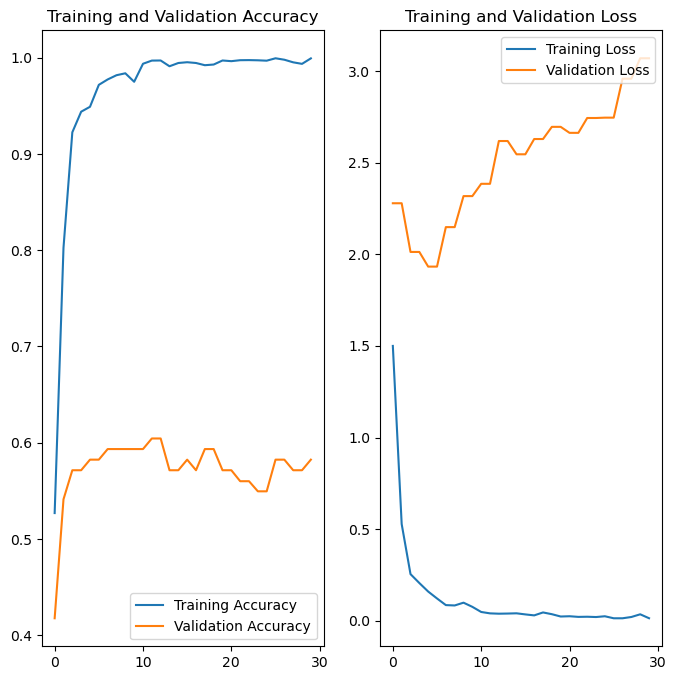

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv('C:/Users/mdzid/Downloads/Book1.csv')

# Extract data
acc = df['accuracy']
val_acc = df['val_accuracy']
loss = df['loss']
val_loss = df['val_loss']

# Plot training and validation accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Show plot
plt.show()
